**Identify customer segments for online retail with the use of K-means clustering using Online_Retail dataset**

In [71]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [73]:
# Import the packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


**Load the Data**

In [76]:
# Read the dataset

Online_Retail = pd.read_excel("Online Retail.xlsx")

**Understand the Data**

In [78]:
# Display the top 5 rows

Online_Retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [87]:
# Inspect the shape of the dataset

Online_Retail.shape

(541909, 8)

In [89]:
# Inspect the different columsn in the dataset

Online_Retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [91]:
# Check the info to see the types of the feature variables and the null values present

Online_Retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [93]:
Online_Retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [95]:
# Check the number of missing values in each column

Online_Retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [97]:
# Calculate the proportion of non-missing values for each column
Online_Retail_missing = Online_Retail.count() / len(Online_Retail)

# Convert the proportions to percentages and calculate the percentage of missing values for each column
Online_Retail_missing = (1 - Online_Retail_missing) * 100

# Sort the missing percentages in descending order 
Online_Retail_missing.sort_values(ascending=False)

CustomerID     24.926694
Description     0.268311
InvoiceNo       0.000000
StockCode       0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
Country         0.000000
dtype: float64

**Clean the Data**

In [100]:
# Description percentage is very less hence removed
Online_Retail.dropna(subset=['Description'], inplace=True)

In [102]:
# Check the number of null values again
Online_Retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

In [104]:
#Fill missing values with 0. 0 is consider as unknown customer
Online_Retail['CustomerID'].fillna(0, inplace=True)

In [106]:
# Check the number of null values again
Online_Retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [108]:
Online_Retail.duplicated().sum()

5268

In [110]:
#Check for duplicates and drop duplicates.

Online_Retail = Online_Retail.drop_duplicates()

In [112]:
Online_Retail.duplicated().sum()


0

In [113]:

Online_Retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535187 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    535187 non-null  object        
 1   StockCode    535187 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     535187 non-null  int64         
 4   InvoiceDate  535187 non-null  datetime64[ns]
 5   UnitPrice    535187 non-null  float64       
 6   CustomerID   535187 non-null  float64       
 7   Country      535187 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.7+ MB


In [116]:
# Handle negative quantities and prices

Online_Retail = Online_Retail[Online_Retail['Quantity'] > 0]
Online_Retail = Online_Retail[Online_Retail['UnitPrice'] > 0]

In [118]:
Online_Retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524878 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524878 non-null  object        
 1   StockCode    524878 non-null  object        
 2   Description  524878 non-null  object        
 3   Quantity     524878 non-null  int64         
 4   InvoiceDate  524878 non-null  datetime64[ns]
 5   UnitPrice    524878 non-null  float64       
 6   CustomerID   524878 non-null  float64       
 7   Country      524878 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.0+ MB


In [120]:
Online_Retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


**Feature Engineering**

In [123]:
# Create amount column
Online_Retail['Amount'] = Online_Retail['UnitPrice'] * Online_Retail['Quantity']

In [125]:
Online_Retail['Year'] = Online_Retail['InvoiceDate'].dt.year
Online_Retail['Month'] = Online_Retail['InvoiceDate'].dt.month
Online_Retail['Day'] = Online_Retail['InvoiceDate'].dt.day
Online_Retail['Hour'] = Online_Retail['InvoiceDate'].dt.hour
Online_Retail['Date'] = Online_Retail['InvoiceDate'].dt.date


In [127]:
Online_Retail['InvoiceDayOfWeek'] = Online_Retail['InvoiceDate'].dt.dayofweek
Online_Retail['IsWeekend'] = (Online_Retail['InvoiceDayOfWeek'] >= 5).astype(int)


In [129]:
Online_Retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Year,Month,Day,Hour,Date,InvoiceDayOfWeek,IsWeekend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,2010-12-01,2,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2010-12-01,2,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8,2010-12-01,2,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2010-12-01,2,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2010-12-01,2,0


In [131]:
Online_Retail['Country'].astype('category').value_counts()

Country
United Kingdom          479985
Germany                   9025
France                    8392
EIRE                      7879
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1958
Portugal                  1492
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Unspecified                442
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     292
Hong Kong                  280
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57


In [133]:
Online_Retail['StockCode'].astype('category').value_counts()

StockCode
85123A    2253
85099B    2109
22423     2007
47566     1699
20725     1582
          ... 
84705C       1
90060B       1
90112        1
90181C       1
m            1
Name: count, Length: 3922, dtype: int64

In [135]:
Online_Retail['Description'].astype('category').value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER    2311
JUMBO BAG RED RETROSPOT               2109
REGENCY CAKESTAND 3 TIER              2007
PARTY BUNTING                         1699
LUNCH BAG RED RETROSPOT               1581
                                      ... 
BREAD BIN, DINER STYLE, IVORY            1
LARGE BLACK DIAMANTE HAIRSLIDE           1
BREAD BIN, DINER STYLE, MINT             1
PURPLE CHUNKY GLASS+BEAD NECKLACE        1
PAINTED HEART WREATH WITH BELL           1
Name: count, Length: 4026, dtype: int64

**Transform the Data**

In [138]:
# Set analysis date (day after last purchase)
analysis_date = Online_Retail['InvoiceDate'].max() + pd.Timedelta(days=1)
print(f"Analysis date: {analysis_date.date()}")

Analysis date: 2011-12-10


In [140]:
# Calculate RFM for each customer
rfm = Online_Retail.groupby('CustomerID').agg({
        'InvoiceDate': lambda x: (analysis_date - x.max()).days,  # Recency
        'InvoiceNo': 'nunique',                                   # Frequency  
        'Amount': 'sum'                                      # Monetary
    }).reset_index()
    
# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
print(f" RFM calculated for {len(rfm)} customers")

# Display RFM statistics
print("\nRFM Statistics:")
print(rfm.describe())

 RFM calculated for 4339 customers

RFM Statistics:
        CustomerID      Recency    Frequency      Monetary
count   4339.00000  4339.000000  4339.000000  4.339000e+03
mean   15296.88177    92.515326     4.600138  2.452664e+03
std     1737.20873   100.012295    22.943499  2.808606e+04
min        0.00000     1.000000     1.000000  3.750000e+00
25%    13812.50000    18.000000     1.000000  3.065050e+02
50%    15299.00000    51.000000     2.000000  6.685800e+02
75%    16778.50000   142.000000     5.000000  1.660890e+03
max    18287.00000   374.000000  1428.000000  1.754902e+06


**Encode Categorical Columns**

In [143]:
#For text data create dummies
# One-hot encoding
Online_Retail = pd.get_dummies(Online_Retail, columns=['Country'], drop_first=True)


In [145]:
# For numerical columns like price, sales, etc.:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
Online_Retail[['UnitPrice', 'Quantity']] = scaler.fit_transform(Online_Retail[['UnitPrice', 'Quantity']])

In [147]:
Online_Retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Amount,Year,Month,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.029541,2010-12-01 08:26:00,-0.038029,17850.0,15.30,2010,12,...,False,False,False,False,False,False,False,False,True,False
1,536365,71053,WHITE METAL LANTERN,-0.029541,2010-12-01 08:26:00,-0.014756,17850.0,20.34,2010,12,...,False,False,False,False,False,False,False,False,True,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,-0.016743,2010-12-01 08:26:00,-0.032488,17850.0,22.00,2010,12,...,False,False,False,False,False,False,False,False,True,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,-0.029541,2010-12-01 08:26:00,-0.014756,17850.0,20.34,2010,12,...,False,False,False,False,False,False,False,False,True,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,-0.029541,2010-12-01 08:26:00,-0.014756,17850.0,20.34,2010,12,...,False,False,False,False,False,False,False,False,True,False


In [149]:
# Check for outliers
print("\nOutlier Analysis (after cleaning):")
Q1 = Online_Retail[['Quantity', 'UnitPrice', 'Amount']].quantile(0.25)
Q3 = Online_Retail[['Quantity', 'UnitPrice', 'Amount']].quantile(0.75)
IQR = Q3 - Q1
outliers = ((Online_Retail[['Quantity', 'UnitPrice', 'Amount']] < (Q1 - 1.5 * IQR)) | 
            (Online_Retail[['Quantity', 'UnitPrice', 'Amount']] > (Q3 + 1.5 * IQR))).sum()
print("Outliers in each column:")
print(outliers)


Outlier Analysis (after cleaning):
Outliers in each column:
Quantity     27111
UnitPrice    37827
Amount       42624
dtype: int64


In [151]:
#  Convert CustomerID to proper type
Online_Retail['CustomerID'] = Online_Retail['CustomerID'].astype(int)

In [153]:
print("\nFinal Dataset Info:")
Online_Retail.info()



Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 524878 entries, 0 to 541908
Data columns (total 52 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   InvoiceNo                     524878 non-null  object        
 1   StockCode                     524878 non-null  object        
 2   Description                   524878 non-null  object        
 3   Quantity                      524878 non-null  float64       
 4   InvoiceDate                   524878 non-null  datetime64[ns]
 5   UnitPrice                     524878 non-null  float64       
 6   CustomerID                    524878 non-null  int32         
 7   Amount                        524878 non-null  float64       
 8   Year                          524878 non-null  int32         
 9   Month                         524878 non-null  int32         
 10  Day                           524878 non-null  int32         
 1

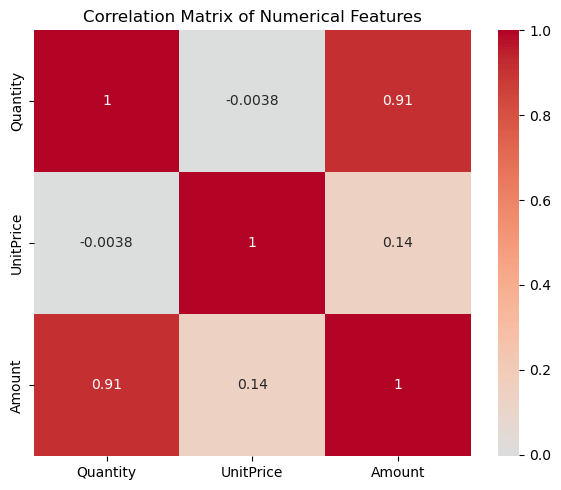

In [155]:
#  Display correlation matrix for numerical features
numerical_features = ['Quantity', 'UnitPrice', 'Amount']
plt.figure(figsize=(6, 5))
correlation_matrix = Online_Retail[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

In [157]:
Online_Retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Amount,Year,Month,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.029541,2010-12-01 08:26:00,-0.038029,17850,15.30,2010,12,...,False,False,False,False,False,False,False,False,True,False
1,536365,71053,WHITE METAL LANTERN,-0.029541,2010-12-01 08:26:00,-0.014756,17850,20.34,2010,12,...,False,False,False,False,False,False,False,False,True,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,-0.016743,2010-12-01 08:26:00,-0.032488,17850,22.00,2010,12,...,False,False,False,False,False,False,False,False,True,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,-0.029541,2010-12-01 08:26:00,-0.014756,17850,20.34,2010,12,...,False,False,False,False,False,False,False,False,True,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,-0.029541,2010-12-01 08:26:00,-0.014756,17850,20.34,2010,12,...,False,False,False,False,False,False,False,False,True,False


In [159]:
# Check current state
print(f"Data types: {Online_Retail.dtypes.value_counts()}")
print(f"Boolean columns: {Online_Retail.select_dtypes(include='bool').columns.tolist()}")



Data types: bool              37
int32              7
object             4
float64            3
datetime64[ns]     1
Name: count, dtype: int64
Boolean columns: ['Country_Austria', 'Country_Bahrain', 'Country_Belgium', 'Country_Brazil', 'Country_Canada', 'Country_Channel Islands', 'Country_Cyprus', 'Country_Czech Republic', 'Country_Denmark', 'Country_EIRE', 'Country_European Community', 'Country_Finland', 'Country_France', 'Country_Germany', 'Country_Greece', 'Country_Hong Kong', 'Country_Iceland', 'Country_Israel', 'Country_Italy', 'Country_Japan', 'Country_Lebanon', 'Country_Lithuania', 'Country_Malta', 'Country_Netherlands', 'Country_Norway', 'Country_Poland', 'Country_Portugal', 'Country_RSA', 'Country_Saudi Arabia', 'Country_Singapore', 'Country_Spain', 'Country_Sweden', 'Country_Switzerland', 'Country_USA', 'Country_United Arab Emirates', 'Country_United Kingdom', 'Country_Unspecified']


**Standardize the Data**

In [162]:
# ========== SIMPLE K-MEANS CLUSTERING ==========

print("SIMPLE CUSTOMER SEGMENTATION WITH K-MEANS")


SIMPLE CUSTOMER SEGMENTATION WITH K-MEANS


In [164]:
# Prepare RFM Data
print("\n1. Preparing RFM Data...")


1. Preparing RFM Data...


In [166]:
# Use the RFM data we already created
rfm_features = ['Recency', 'Frequency', 'Monetary']
X = rfm[rfm_features].copy()

In [168]:
# ========== STEP 2: Standardize Data ==========
print("\n2. Standardizing Data...")


2. Standardizing Data...


In [170]:
# Standardize and cluster (this works with mixed numerical + boolean)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Data standardized")

Data standardized


**Determine the Optimal Number of Clusters**

In [173]:
#  Find Best Number of Clusters
print("\n3. Finding Optimal Clusters...")



3. Finding Optimal Clusters...


In [175]:
# Simple elbow method
wcss = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    print(f"k={k}: WCSS = {kmeans.inertia_:.0f}")


k=2: WCSS = 5270
k=3: WCSS = 1800
k=4: WCSS = 1332
k=5: WCSS = 915
k=6: WCSS = 717
k=7: WCSS = 583


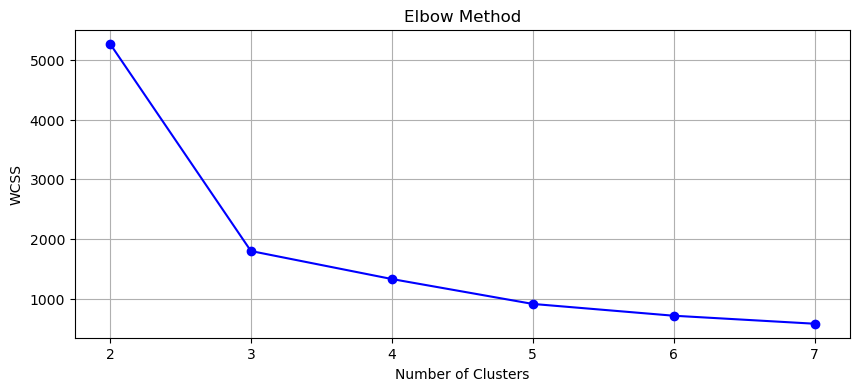

In [177]:
# Plot elbow curve
plt.figure(figsize=(10, 4))
plt.plot(range(2, 8), wcss, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [179]:
# Choose k=4 (common choice for RFM)
optimal_k = 4
print(f"Selected clusters: {optimal_k}")



Selected clusters: 4


**Run K-Means Clustering**

In [182]:
# ========== STEP 4: Run K-Means ==========
print(f"\n4. Running K-Means with {optimal_k} clusters...")

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)


4. Running K-Means with 4 clusters...


In [184]:
# Add clusters to RFM data
rfm_clustered = X.copy()
rfm_clustered['Cluster'] = clusters

print("Clustering completed!")
print(f"Cluster sizes:\n{rfm_clustered['Cluster'].value_counts().sort_index()}")

Clustering completed!
Cluster sizes:
Cluster
0     819
1       1
2     626
3    2893
Name: count, dtype: int64



5. Creating Visualizations...


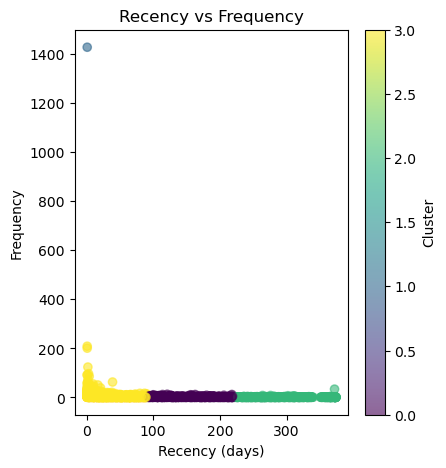

In [186]:
# Simple Visualizations
print("\n5. Creating Visualizations...")

# Create one simple visualization
plt.figure(figsize=(15, 5))
# Plot 1: Recency vs Frequency
plt.subplot(1, 3, 1)
plt.scatter(rfm_clustered['Recency'], rfm_clustered['Frequency'], 
           c=rfm_clustered['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')
plt.title('Recency vs Frequency')
plt.colorbar(label='Cluster')

Most of the points are near 0 to 50 and frequency < 200 this means most of the customers have recently purchased but not too frequently.
very few customer has very high frequency > 1400 and very low recency less than 10
recency > 200 frequency very low thet are inactive customers

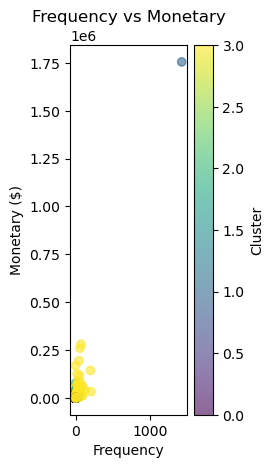

In [206]:
# Plot 2: Frequency vs Monetary
plt.subplot(1, 3, 2)
plt.scatter(rfm_clustered['Frequency'], rfm_clustered['Monetary'], 
           c=rfm_clustered['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Frequency')
plt.ylabel('Monetary ($)')
plt.title('Frequency vs Monetary')
plt.colorbar(label='Cluster')

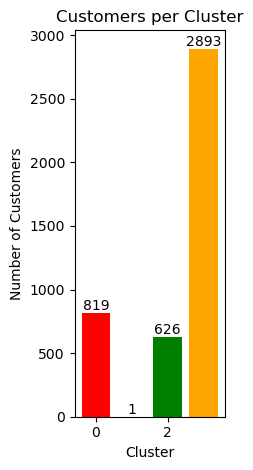

In [208]:
# Plot 3: Cluster distribution
plt.subplot(1, 3, 3)
cluster_counts = rfm_clustered['Cluster'].value_counts().sort_index()
plt.bar(cluster_counts.index, cluster_counts.values, color=['red', 'blue', 'green', 'orange'])
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Customers per Cluster')
for i, count in enumerate(cluster_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [210]:
# Analyze Clusters
print("\n6. Cluster Analysis:")



6. Cluster Analysis:


In [212]:
# Simple statistics
cluster_stats = rfm_clustered.groupby('Cluster').agg({
    'Recency': ['mean', 'count'],
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(1)

print("\nCluster Statistics:")
print(cluster_stats)


Cluster Statistics:
        Recency       Frequency   Monetary
           mean count      mean       mean
Cluster                                   
0         152.4   819       2.2      792.6
1           1.0     1    1428.0  1754901.9
2         294.4   626       1.4      605.7
3          31.9  2893       5.5     2716.5


In [217]:
# ========== STEP 7: Customer Profiles ==========
print("\n7. Customer Profiles:")

for cluster in sorted(rfm_clustered['Cluster'].unique()):
    data = rfm_clustered[rfm_clustered['Cluster'] == cluster]
    
    print(f"\nCluster {cluster} ({len(data)} customers):")
    print(f"  • Avg Recency: {data['Recency'].mean():.0f} days")
    print(f"  • Avg Frequency: {data['Frequency'].mean():.1f} purchases")
    print(f"  • Avg Spending: ${data['Monetary'].mean():.0f}")
    
    # Simple classification
    if data['Recency'].mean() < 100 and data['Monetary'].mean() > 500:
        print("  → Premium Customers")
    elif data['Recency'].mean() > 200:
        print("  → Inactive Customers")
    elif data['Frequency'].mean() > 5:
        print("  → Loyal Customers")
    else:
        print("  → Regular Customers")


7. Customer Profiles:

Cluster 0 (819 customers):
  • Avg Recency: 152 days
  • Avg Frequency: 2.2 purchases
  • Avg Spending: $793
  → Regular Customers

Cluster 1 (1 customers):
  • Avg Recency: 1 days
  • Avg Frequency: 1428.0 purchases
  • Avg Spending: $1754902
  → Premium Customers

Cluster 2 (626 customers):
  • Avg Recency: 294 days
  • Avg Frequency: 1.4 purchases
  • Avg Spending: $606
  → Inactive Customers

Cluster 3 (2893 customers):
  • Avg Recency: 32 days
  • Avg Frequency: 5.5 purchases
  • Avg Spending: $2717
  → Premium Customers


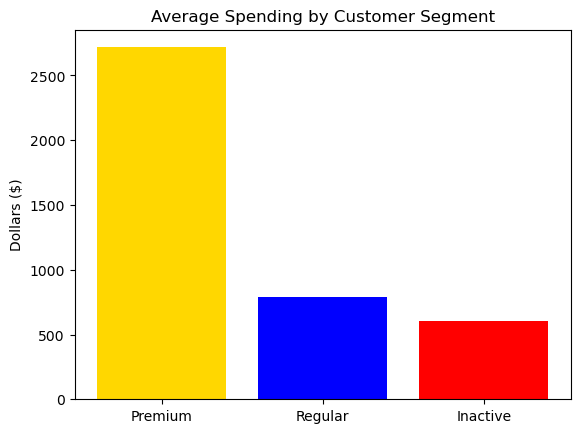

In [223]:
segments = ['Premium', 'Regular', 'Inactive']
avg_spend = [2717, 793, 606]  # Average spending per segment

plt.bar(segments, avg_spend, color=['gold', 'blue', 'red'])
plt.title('Average Spending by Customer Segment')
plt.ylabel('Dollars ($)')
plt.show()